Title: Blood parameter analysis using Random Forest

Objective: This project uses machine learning to analyze blood test parameters and predict health outcomes.
It includes preprocessing steps, model training, evaluation, and visualization of results.

Dataset:
Source: https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction/data Features: Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Red Blood Cells, Hematocrit, Mean Corpuscular Volume, Mean Corpuscular Hemoglobin, Mean Corpuscular Hemoglobin Concentration, Insulin, BMI, Systolic Blood Pressure, Diastolic Blood Pressure, Triglycerides, HbA1c, LDL Cholesterol, HDL Cholesterol, ALT, AST, Heart Rate, Creatinine, Troponin, C-reactive Protein
Target: Disease (Healthy, Anemia, Diabetes, Thromboc, Thalasse)
Size: 2351 rows, 25 columns

Packages used: pandas 2.0.3, numpy 1.24.3, seaborn 0.12.2, shap 0.48.0, matplotlib 3.7.2, scikit-learn 1.3.0

In [2]:
#Importing required python libraries for data manipulation, visualization and machine learning
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

In [183]:
#Load the dataset
dataset = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')

#Separate features and target variables first
x = dataset.drop('Disease', axis=1)
le = LabelEncoder()
y = le.fit_transform(dataset['Disease'])

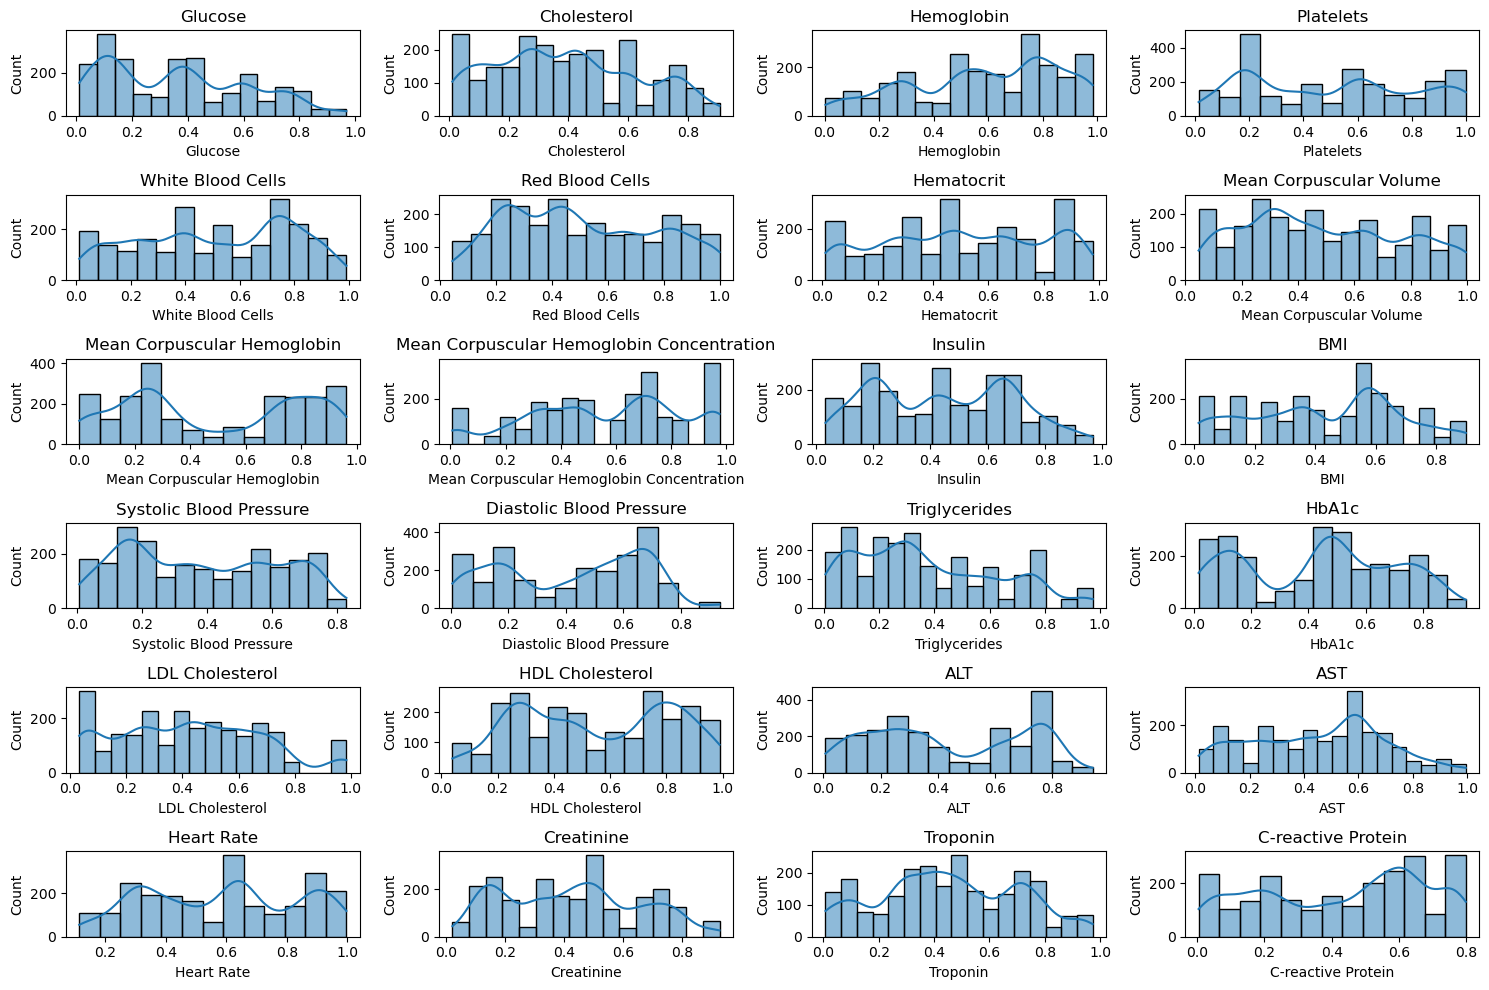

In [184]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)
    sns.histplot(dataset[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [185]:
#Identify numeric and categorical columns **only from X, not full dataset**
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

#Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Add preprocessing to the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
    ]
)

In [186]:
#Splits data into training and testing data (30% test and 70% train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [187]:
#Creating the Random Forest Classifier model
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=12))
])

#Training the model
rf.fit(x_train, y_train)

#Predict on test data
y_pred = rf.predict(x_test)


Accuracy:  1.0

Accuracy score:  1.0

Confusion matrix:
 [[185   0   0   0   0]
 [  0 165   0   0   0]
 [  0   0 164   0   0]
 [  0   0   0 162   0]
 [  0   0   0   0  30]]

Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       165
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00        30

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706

Cross-validation scores: [1. 1. 1. 1. 1.]

Mean CV accuracy: 1.0


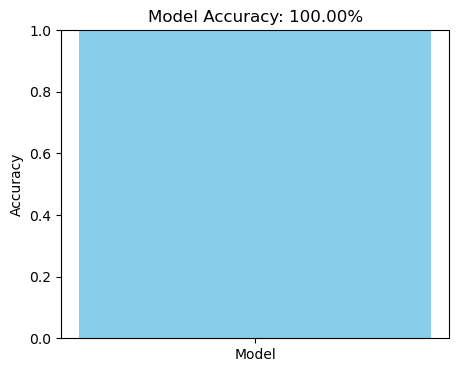

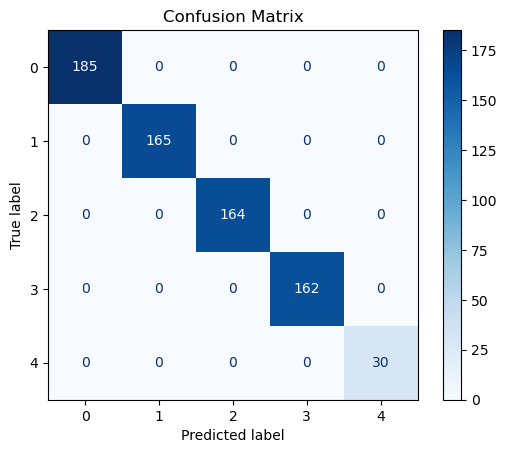

In [188]:
#Calculating and printing accuracy
acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy: ", rf.score(x_test, y_test))
print("\nAccuracy score: ", acc)
print("\nConfusion matrix:\n", cm)
print("\nClassification_report:\n", classification_report(y_test, y_pred))

cv_scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"\nMean CV accuracy: {cv_scores.mean()}")

#Visualizing accuracy
plt.figure(figsize=(5,4))
plt.bar(['Model'], [acc], color='skyblue')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title(f'Model Accuracy: {acc:.2%}')
plt.show()

#Plotting Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Feature Importances:
                                      Feature  Importance
8                 Mean Corpuscular Hemoglobin    0.105421
4                           White Blood Cells    0.075194
6                                  Hematocrit    0.064323
3                                   Platelets    0.063473
5                             Red Blood Cells    0.062062
7                     Mean Corpuscular Volume    0.049018
17                            HDL Cholesterol    0.048331
19                                        AST    0.043166
9   Mean Corpuscular Hemoglobin Concentration    0.042313
1                                 Cholesterol    0.037975
20                                 Heart Rate    0.035790
15                                      HbA1c    0.035325
18                                        ALT    0.034901
2                                  Hemoglobin    0.031873
13                   Diastolic Blood Pressure    0.030995
16                            LDL Cholesterol    0.

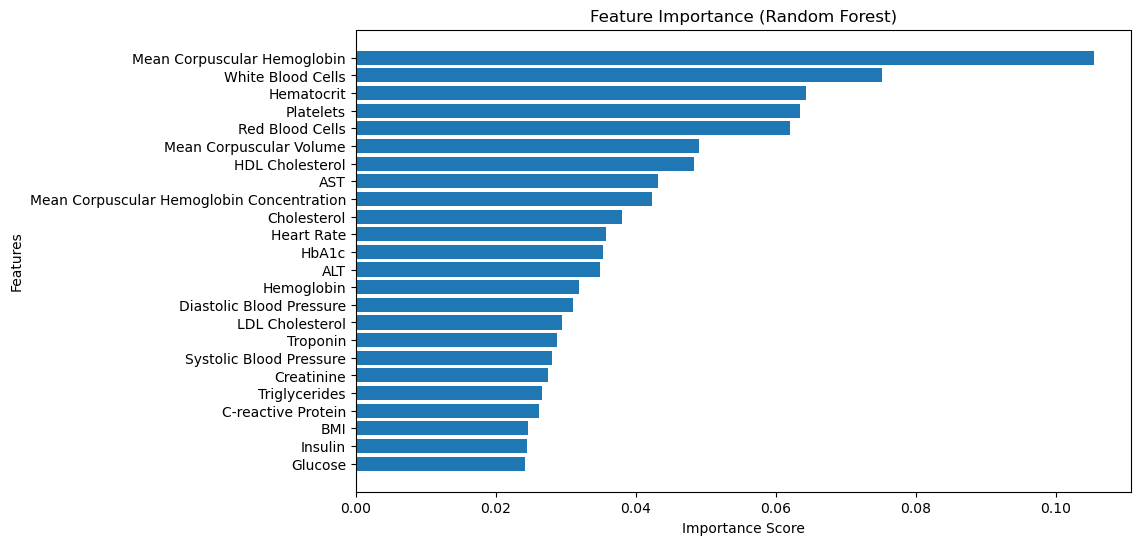

In [189]:
#Access the classifier inside the pipeline
rf_model = rf.named_steps['classifier']

#Get the transformed feature names (after preprocessing)
feature_names = rf.named_steps['preprocessor'].get_feature_names_out()

#Getting feature importances
importance_values = rf_model.feature_importances_

#Creating a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

#Display table
print("Feature Importances:")
print(feature_importance_df)

#Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

C:\Users\saqib\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saqib\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:758: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)


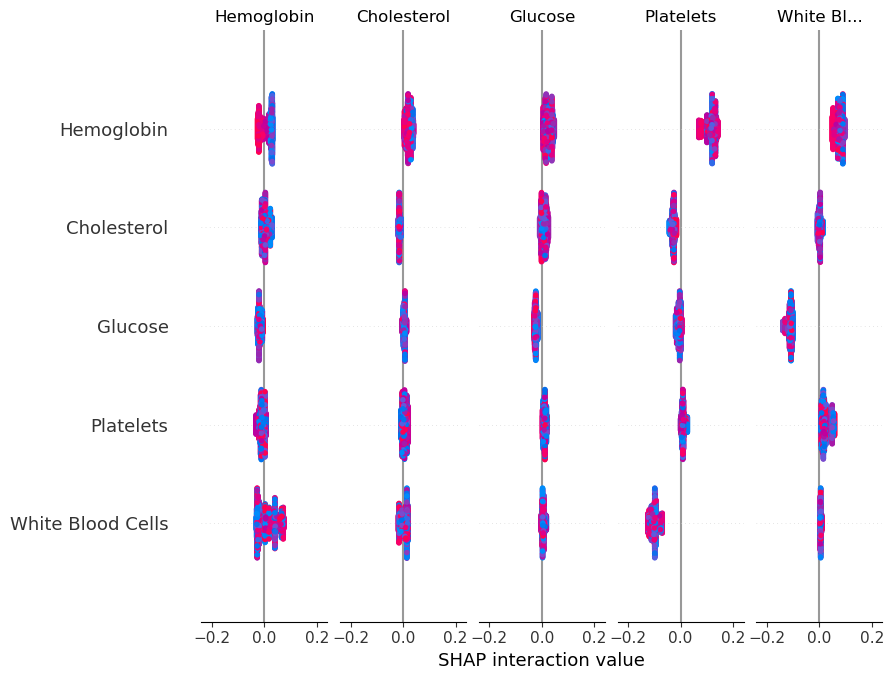

In [190]:
rfm = rf.named_steps['classifier']

explainer = shap.TreeExplainer(rfm)

shap_values = explainer.shap_values(x)

#Summary plot
shap.summary_plot(shap_values, x)

normalized_value = raw_value−min / max − min

In [191]:
#Dictionary storing normal ranges for various medical parameters
normal_ranges = {
    "Glucose": (70, 140),  #mg/dL
    "Cholesterol": (125, 200),  #mg/dL
    "Hemoglobin": (13.5, 17.5),  #g/dL
    "Platelets": (150000, 450000),  #per microliter of blood
    "White Blood Cells": (4000, 11000),  #per cubic millimeter of blood
    "Red Blood Cells": (4.2, 5.4),  #million cells per microliter of blood
    "Hematocrit": (38, 52),  #percentage
    "Mean Corpuscular Volume": (80, 100),  #femtoliters
    "Mean Corpuscular Hemoglobin": (27, 33),  # picograms
    "Mean Corpuscular Hemoglobin Concentration": (32, 36),  #grams per deciliter
    "Insulin": (5, 25),  #microU/mL
    "BMI": (18.5, 24.9),  #kg/m^2
    "Systolic Blood Pressure": (90, 120),  #mmHg
    "Diastolic Blood Pressure": (60, 80),  #mmHg
    "Triglycerides": (50, 150),  #mg/dL
    "HbA1c": (4, 6),  #percentage
    "LDL Cholesterol": (70, 130),  #mg/dL
    "HDL Cholesterol": (40, 60),  #mg/dL
    "ALT": (10, 40),  #U/L
    "AST": (10, 40),  #U/L
    "Heart Rate": (60, 100),  #beats per minute
    "Creatinine": (0.6, 1.2),  #mg/dL
    "Troponin": (0, 0.04),  #ng/mL
    "C-reactive Protein": (0, 3),  #mg/L
}

#Function to normalize a given medical test value to a range between 0 and 1
def normalize_value(feature, value):
    low, high = normal_ranges[feature]
    value = max(min(value, high), low)  #clip to range
    return (value - low) / (high - low)  #normalize between 0 and 1

#Function to collect medical test values from the user
def get_user_input():
    print("Please enter the following medical test values:")
    user_values = []
    for feature in normal_ranges:
        while True:
            try:
                val = float(input(f"{feature} (normal range {normal_ranges[feature][0]} - {normal_ranges[feature][1]}): "))
                break  #exit loop if output is valid
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
        norm_val = normalize_value(feature, val)
        user_values.append(norm_val)
    return user_values

In [193]:
#Prints the normalized input so that the user can verify the data before making the prediction
normalized_input = get_user_input()
print("\nNormalized input ready for prediction:")
print(normalized_input)

Please enter the following medical test values:
Glucose (normal range 70 - 140): 130
Cholesterol (normal range 125 - 200): 180
Hemoglobin (normal range 13.5 - 17.5): 14.8
Platelets (normal range 150000 - 450000): 300000
White Blood Cells (normal range 4000 - 11000): 7000
Red Blood Cells (normal range 4.2 - 5.4): 4.7
Hematocrit (normal range 38 - 52): 44
Mean Corpuscular Volume (normal range 80 - 100): 90
Mean Corpuscular Hemoglobin (normal range 27 - 33): 30
Mean Corpuscular Hemoglobin Concentration (normal range 32 - 36): 34
Insulin (normal range 5 - 25): 15
BMI (normal range 18.5 - 24.9): 23
Systolic Blood Pressure (normal range 90 - 120): 115
Diastolic Blood Pressure (normal range 60 - 80): 75
Triglycerides (normal range 50 - 150): 120
HbA1c (normal range 4 - 6): 6
LDL Cholesterol (normal range 70 - 130): 110
HDL Cholesterol (normal range 40 - 60): 45
ALT (normal range 10 - 40): 30
AST (normal range 10 - 40): 25
Heart Rate (normal range 60 - 100): 85
Creatinine (normal range 0.6 - 1

In [194]:
input_array = np.array([normalized_input])  # Reshape to 2D

# Convert to DataFrame with correct column names
input_df = pd.DataFrame(input_array, columns=numeric_cols)

# Make prediction
pred = rf.predict(input_df)
pred_label = le.inverse_transform(pred)
print(f"\nPredicted Disease: {pred_label[0]}")


Predicted Disease: Diabetes
